In [1]:
import pandas as pd
import ast
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
df_DA=df[df['job_title_short']=='Data Analyst'].copy()

c:\Users\sunse\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


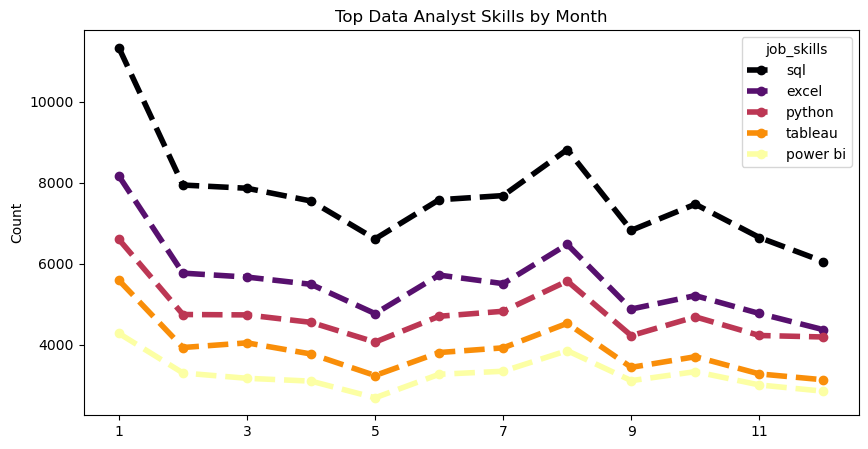

In [11]:
df_DA['job_posted_month_no']=df_DA['job_posted_date'].dt.month
df_DA_exploded = df_DA.explode('job_skills')
df_DA_pivot = df_DA_exploded.pivot_table(index='job_posted_month_no',columns='job_skills',aggfunc='size', fill_value=0)
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_pivot = df_DA_pivot.drop('Total')
df_DA_pivot.iloc[:,:5].plot(
    kind='line',
    linewidth=4,
    linestyle='--',
    colormap='inferno',
    markersize=12,
    marker='.',
    figsize=(10,5)
    )
plt.title('Top Data Analyst Skills by Month')
plt.xlabel('')
plt.ylabel('Count')
plt.show()

In [14]:
df = df[df['job_title_short']=='Data Scientist']
df_exploded = df.explode('job_skills')
skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills','count'),
    median_salary=('salary_year_avg','median')
)
skill_number = 20
skill_stats = skill_stats.sort_values(by='skill_count',ascending=False).head(skill_number)

In [17]:
from adjustText import adjust_text

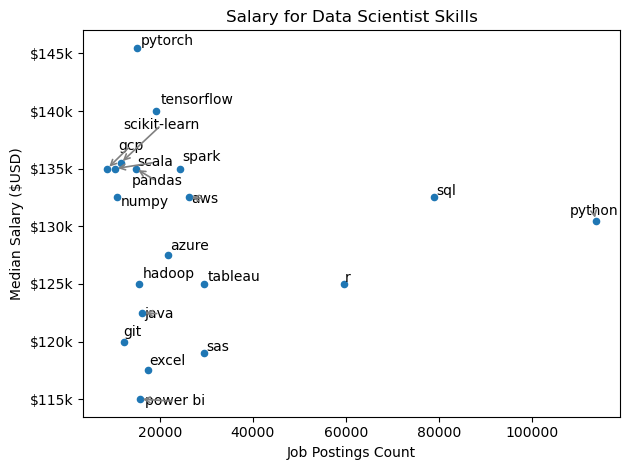

In [28]:

skill_stats.plot(kind='scatter',x='skill_count',y='median_salary')
ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}k'))

plt.xlabel('Job Postings Count')
plt.ylabel('Median Salary ($USD)')
plt.title('Salary for Data Scientist Skills')
texts = []
for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i],skill_stats['median_salary'].iloc[i],txt))

adjust_text(
    texts,
    ax=ax,
    expand_text=(1.1, 1.2),
    expand_points=(1.2, 1.4),
    arrowprops=dict(arrowstyle='->', color='gray', lw=1.2),
    only_move={'points': 'y', 'text': 'y'},  # move only vertically for cleaner alignment
)
plt.tight_layout()
plt.show()